In [29]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
train_file_path = pd.read_csv("train-data.tsv", sep='\t', names=['label', 'text'])
test_file_path = pd.read_csv("valid-data.tsv", sep='\t', names=['label', 'text'])

In [33]:
train_file_path.head()

,label,text
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [4]:
train_file_path.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3619   3430                             sorry, i'll call later   22
spam    560    505  hmv bonus special 500 pounds of genuine hmv vo...    3

In [7]:
train_file_path['length'] = train_file_path['text'].apply(len)
train_file_path

,label,text,length
0,ham,ahhhh...just woken up!had a bad dream about u ...,146
1,ham,you can never do nothing,24
2,ham,"now u sound like manky scouse boy steve,like! ...",115
3,ham,mum say we wan to go then go... then she can s...,83
4,ham,never y lei... i v lazy... got wat? dat day ü ...,77
...,...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...,74
4175,ham,what do u reckon as need 2 arrange transport i...,69
4176,spam,free entry into our £250 weekly competition ju...,106
4177,spam,-pls stop bootydelious (32/f) is inviting you ...,152


<Axes: ylabel='Frequency'>

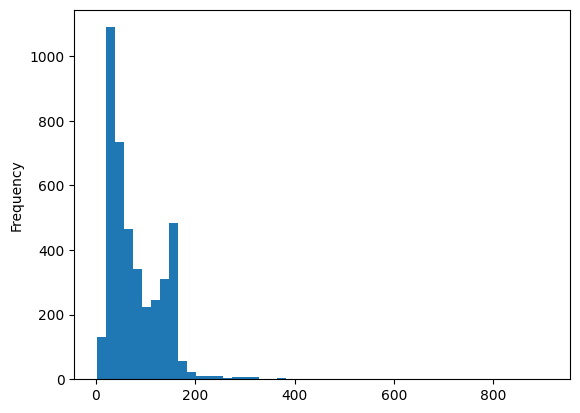

In [12]:
train_file_path['length'].plot.hist(bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

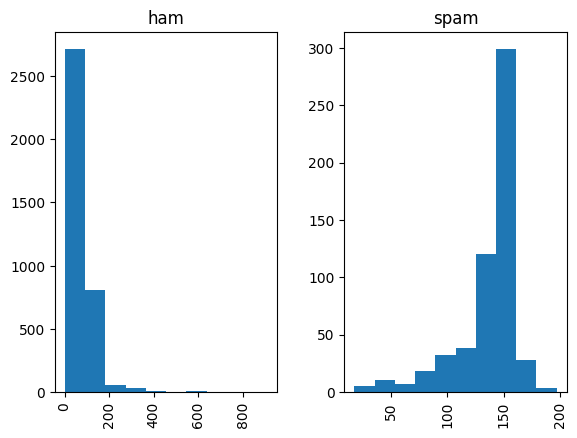

In [13]:
train_file_path.hist(column='length', by='label')

In [14]:
X_train_texts = train_file_path['text'].astype(str).tolist()
y_train = train_file_path['label'].apply(lambda x: 1 if x == 'spam' else 0).tolist()


X_test_texts = test_file_path['text'].astype(str).tolist()
y_test = test_file_path['label'].apply(lambda x: 1 if x == 'spam' else 0).tolist()

In [15]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train_texts).toarray()
X_test = cv.transform(X_test_texts).toarray()

In [16]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8837 - loss: 0.2918 - val_accuracy: 0.9892 - val_loss: 0.0488
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9969 - loss: 0.0165 - val_accuracy: 0.9878 - val_loss: 0.0487
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 99ms/step - accuracy: 0.9997 - loss: 0.0019 - val_accuracy: 0.9878 - val_loss: 0.0688
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 1.0000 - loss: 3.2419e-04 - val_accuracy: 0.9878 - val_loss: 0.0727
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 1.0000 - loss: 1.5392e-04 - val_accuracy: 0.9878 - val_loss: 0.0777
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9852 - loss: 0.0985
Loss: 0.07771071046590805, Accuracy: 0.9877873659133911


In [18]:
def predict_message(pred_text):
    
    transformed_text = cv.transform([pred_text]).toarray()
    
    prediction_prob = model.predict(transformed_text)[0][0]
    
    label = 'spam' if prediction_prob > 0.5 else 'ham'
    
    return [prediction_prob, label]

def test_predictions():
    test_messages = [
        "how are you doing today",
        "sale today! to stop texts call 98912460324",
        "i dont want to go. can we try it a different day? available sat",
        "our new mobile video service is live. just install on your phone to start watching.",
        "you have won £1000 cash! call to claim your prize.",
        "i'll bring it tomorrow. don't forget the milk.",
        "wow, is your arm alright. that happened to me one time too"
    ]

    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
    passed = True

    for msg, ans in zip(test_messages, test_answers):
        prediction = predict_message(msg)
        print(f"Message: '{msg}'\nPrediction: {prediction[1]}, Probability: {prediction[0]}")
        if prediction[1] != ans:
            passed = False

    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")

test_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Message: 'how are you doing today'
Prediction: ham, Probability: 3.5144166758982465e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Message: 'sale today! to stop texts call 98912460324'
Prediction: spam, Probability: 0.7681605219841003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Message: 'i dont want to go. can we try it a different day? available sat'
Prediction: ham, Probability: 5.657803399117256e-07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Message: 'our new mobile video service is live. just install on your phone to start watching.'
Prediction: spam, Probability: 0.9993682503700256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Message: 'you have won £1000 cash! call to claim your prize.'
Prediction: spam, Probability: 0.9998226165771484
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Message: 'i'll bring it tomorrow. don't forget the milk.'
Prediction: ham, Probability: 3.588022764233756e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Message: 'wow, is your arm alright. that happene